In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd

In [3]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240910_140319.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240910_140319.braidz using pyarrow


In [4]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0             1     4236  1.725970e+09 -0.087484  0.098130  0.084247   
 1             2     4239  1.725970e+09 -0.086473  0.092216  0.085602   
 2             3     4249  1.725970e+09 -0.084927  0.072976  0.087512   
 3             4     4252  1.725970e+09 -0.084311  0.065745  0.087597   
 4             5     4255  1.725970e+09 -0.084116  0.059503  0.088082   
 ...         ...      ...           ...       ...       ...       ...   
 8913504   65723  7961994  1.726049e+09 -0.223620 -0.009865  0.000763   
 8913505   65721  7961995  1.726049e+09 -0.237719 -0.027567  0.069313   
 8913506   65723  7961995  1.726049e+09 -0.223603 -0.009881  0.000788   
 8913507   65721  7961996  1.726049e+09 -0.237594 -0.027565  0.069265   
 8913508   65723  7961996  1.726049e+09 -0.223582 -0.009866  0.000816   
 
              xvel      yvel      zvel           P00           P01  \
 0       -1.450012  1.298756 -0.184619  1.172326e-07

In [59]:
timestamps = []
for idx, row in csvs["opto"].iterrows():
    obj_id = int(row.obj_id)
    frame = int(row.frame)

    timestamps.append(df[(df.obj_id == obj_id) & (df.frame == frame)].timestamp.values)

In [65]:
timestamps

array([1.72597045e+09, 1.72597046e+09, 1.72597051e+09, 1.72597072e+09,
       1.72597075e+09, 1.72597076e+09, 1.72597088e+09, 1.72597089e+09,
       1.72597116e+09, 1.72597117e+09, 1.72597129e+09, 1.72597151e+09,
       1.72597167e+09, 1.72597194e+09, 1.72597203e+09, 1.72597240e+09,
       1.72597240e+09, 1.72597241e+09, 1.72597465e+09, 1.72597578e+09,
       1.72597579e+09, 1.72597660e+09, 1.72597689e+09, 1.72597756e+09,
       1.72597814e+09, 1.72597847e+09, 1.72597913e+09, 1.72597930e+09,
       1.72597941e+09, 1.72597947e+09, 1.72597997e+09, 1.72597998e+09,
       1.72598046e+09, 1.72598048e+09, 1.72598120e+09, 1.72598155e+09,
       1.72598251e+09, 1.72598261e+09, 1.72598277e+09, 1.72598290e+09,
       1.72598291e+09, 1.72598307e+09, 1.72598317e+09, 1.72598321e+09,
       1.72598327e+09, 1.72598329e+09, 1.72598337e+09, 1.72598361e+09,
       1.72598361e+09, 1.72598371e+09, 1.72598411e+09, 1.72598427e+09,
       1.72598428e+09, 1.72598465e+09, 1.72598477e+09, 1.72598477e+09,
      

In [6]:
data = extract_stimulus_centered_data(df, csvs["opto"])

In [7]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{53,
 54,
 55,
 57,
 59,
 60,
 61,
 369,
 568,
 606,
 699,
 708,
 709,
 720,
 721,
 724,
 786,
 788,
 797,
 801,
 817,
 820,
 821,
 863,
 1106,
 1110,
 1112,
 1179,
 1204,
 1226,
 1291,
 1393,
 1746,
 1763,
 1764,
 1797,
 1801,
 1802,
 1828,
 1860,
 1879,
 2356,
 2727,
 2770,
 2808,
 2811,
 2815,
 2984,
 3033,
 3280,
 3308,
 3345,
 3521,
 3523,
 3598,
 3860,
 4185,
 4233,
 4275,
 4314,
 4590,
 4825,
 4827,
 4976,
 5126,
 5405,
 5592,
 5597,
 5894,
 5909,
 5962,
 5965,
 5971,
 5972,
 5985,
 5987,
 6017,
 6128,
 6130,
 6341,
 6415,
 6487,
 6517,
 6524,
 6567,
 6682,
 6723,
 6726,
 6769,
 7008,
 7178,
 7238,
 7537,
 7826,
 7837,
 7860,
 7978,
 8399,
 8922,
 8928,
 9114,
 9119,
 9145,
 9230,
 9883,
 9937,
 10039,
 10684,
 10756,
 10760,
 10909,
 10955,
 11840,
 11844,
 12184,
 12251,
 12252,
 12328,
 12547,
 12564,
 12843,
 12883,
 12926,
 13036,
 13086,
 13166,
 13357,
 13410,
 13421,
 13433,
 13686,
 13718,
 13984,
 14016,
 14149,
 14338,
 14631,
 14713,
 15283,
 15435,
 15444,
 15470,
 

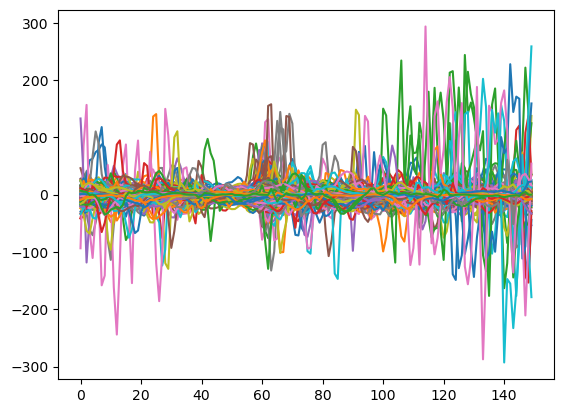

In [8]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

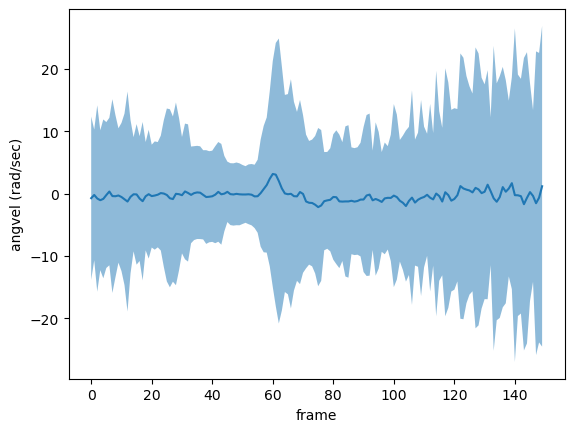

In [9]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

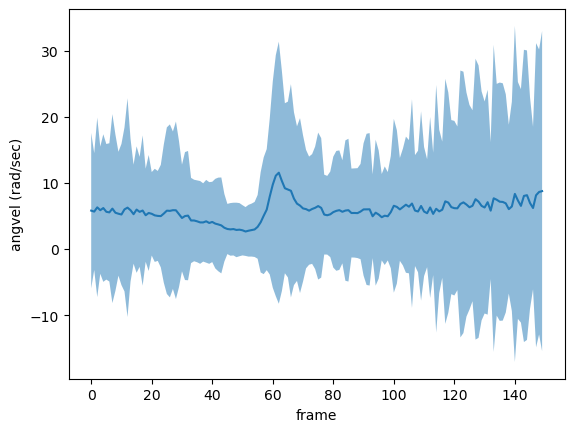

In [10]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

<Axes: >

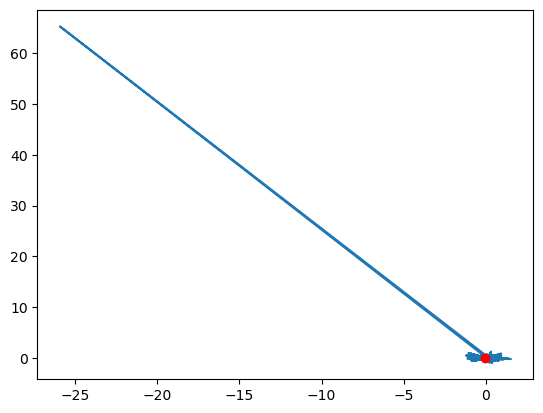

In [11]:
plot_trajectory(df)

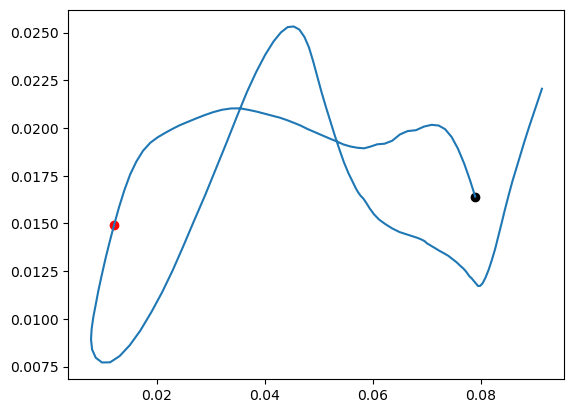

In [53]:
i = 13
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

In [12]:
data1_max = np.max(np.abs(np.asarray(data["angular_velocity"])[:, 50:80]), axis=1)

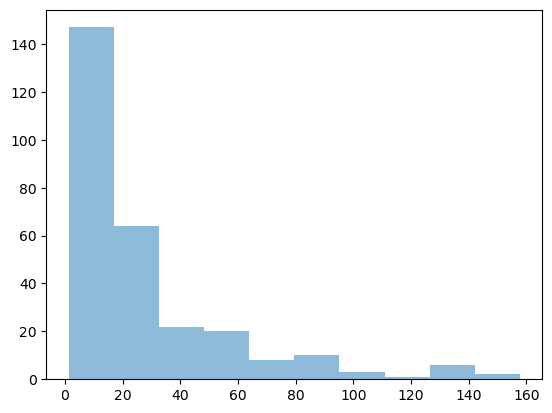

In [13]:
plt.figure()
plt.hist(data1_max, alpha=0.5)
plt.show()

In [14]:
mean_data = np.mean(data1_max)
print(mean_data)
std_dev = np.std(data1_max, ddof=1)  
std_error = std_dev / np.sqrt(len(data1_max))
print(f"Standard Deviation of data1_max: {std_dev:.4f}")
print(f"Standard Error of data1_max: {std_error:.4f}")

27.85661016538197
Standard Deviation of data1_max: 29.6670
Standard Error of data1_max: 1.7635


In [15]:
print(f"Shape of data1_max: {data1_max.shape}")

Shape of data1_max: (283,)


In [16]:
flattened_data = data1_max.ravel()
print(f"Shape of flattened data: {flattened_data.shape}")
k2, p_value = stats.normaltest(flattened_data)
print(f"D'Agostino's K-squared Test Statistic: {k2}")
print(f"P-value: {p_value}")

Shape of flattened data: (283,)
D'Agostino's K-squared Test Statistic: 130.30727572743186
P-value: 5.05981455344719e-29
